In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams["figure.dpi"] = 150
import seaborn as sns
import os

# enable copy on write (default in pandas 3.0)
pd.options.mode.copy_on_write = True

In [2]:
power_2023 = pd.read_excel('../power_data/2023_Annual_Summary.xls', skiprows=1, parse_dates=['Date Event Began', 'Date of Restoration'])
power_2023 = power_2023[power_2023['Event Type'].str.contains(r'Severe Weather', regex=True)]
weather_2023 = pd.read_csv('../weather_data/cleaned/tvs-2023.csv', parse_dates=['DATE'])

WARNING *** file size (117444) not 512 + multiple of sector size (512)


### Check the yearly distribution of power outages and tornado events

Text(0.5, 0, 'DATE')

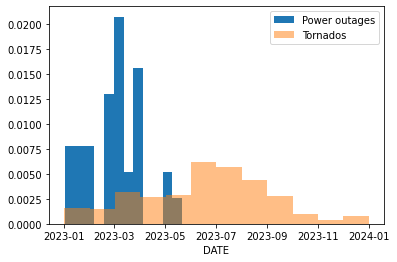

In [3]:
plt.hist(power_2023['Date Event Began'], bins=12, density=True, label='Power outages')
plt.hist(weather_2023['DATE'], bins=12, alpha=0.5, density=True, label='Tornados')
plt.legend()
plt.xlabel('DATE')

## Which Tornado value correlates with which one

In [4]:
corr_matrix = weather_2023[cols[10:]].corr()

NameError: name 'cols' is not defined

<AxesSubplot: >

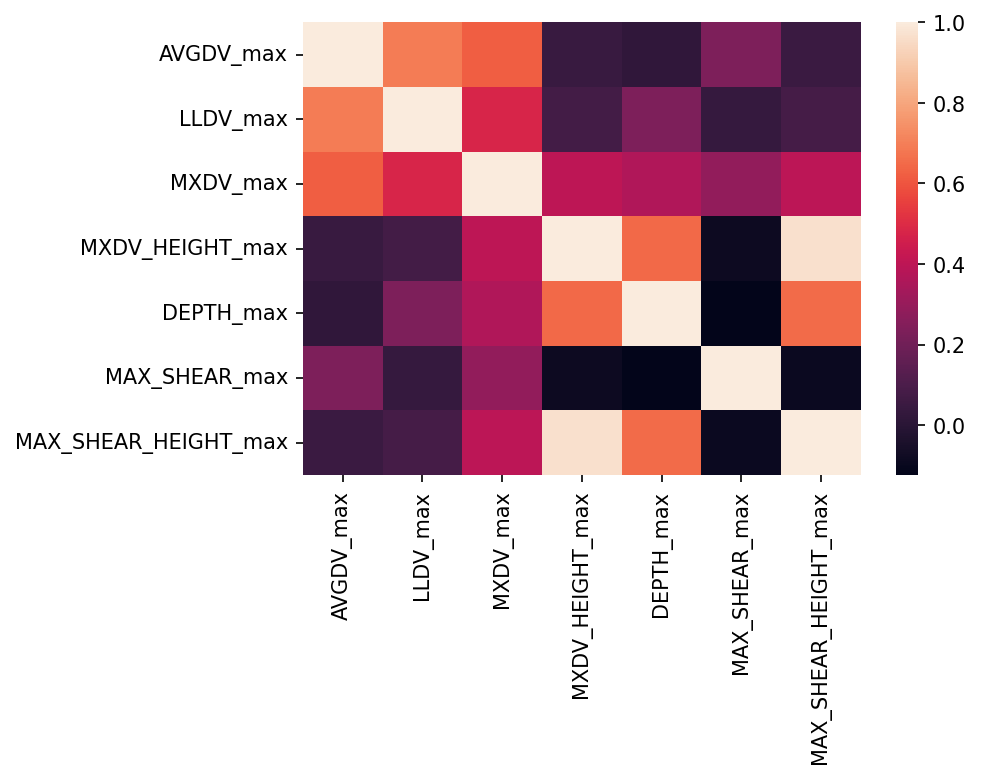

In [23]:
sns.heatmap(corr_matrix)

In [25]:
merged = pd.read_csv('../merged/tornados_outage_2023.csv', parse_dates=['DATE'])

In [26]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40152 entries, 0 to 40151
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            40152 non-null  int64         
 1   DATE                  40152 non-null  datetime64[ns]
 2   AVGDV_max             40152 non-null  int64         
 3   LLDV_max              40152 non-null  int64         
 4   MXDV_max              40152 non-null  int64         
 5   MXDV_HEIGHT_max       40152 non-null  int64         
 6   DEPTH_max             40152 non-null  float64       
 7   MAX_SHEAR_max         40152 non-null  int64         
 8   MAX_SHEAR_HEIGHT_max  40152 non-null  float64       
 9   location              40152 non-null  object        
 10  county                39466 non-null  object        
 11  state                 40152 non-null  object        
 12  Event Month           7285 non-null   object        
 13  power_outage    

In [41]:
bydate_withoutage = merged[merged.power_outage].groupby('DATE')['DATE'].count()
bydate_all = merged.groupby('DATE')['DATE'].count()

In [44]:
bydate_withoutage.index

DatetimeIndex(['2023-01-12', '2023-01-23', '2023-01-24', '2023-01-25',
               '2023-01-31', '2023-02-22', '2023-02-25', '2023-03-02',
               '2023-03-03', '2023-03-25', '2023-03-31', '2023-04-01',
               '2023-04-29', '2023-05-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [47]:
dates_withoutage, counts_withoutage = bydate_withoutage.index, np.array(bydate_withoutage)
dates_all, counts_all = bydate_all.index, np.array(bydate_all)


Text(0, 0.5, 'number of events')

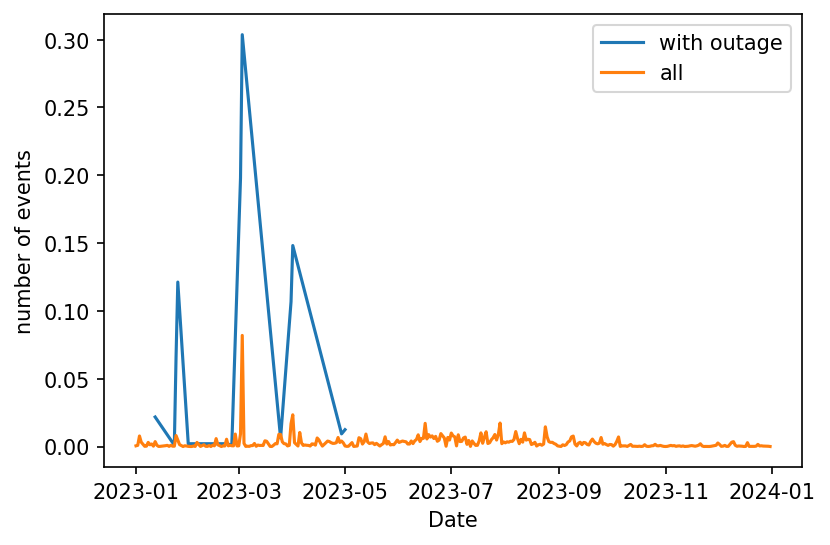

In [52]:
plt.plot(dates_withoutage, counts_withoutage/np.sum(counts_withoutage), label='with outage')
plt.plot(dates_all, counts_all/np.sum(counts_all), label='all')
plt.legend()
plt.xlabel('Date')
plt.ylabel('number of events')

Text(0, 0.5, 'normalized number of events')

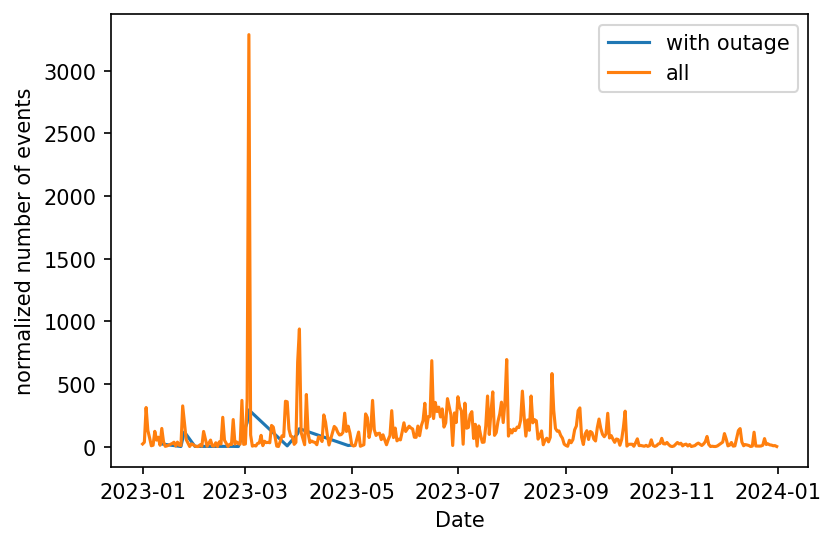

In [50]:
plt.plot(dates_withoutage, counts_withoutage, label='with outage')
plt.plot(dates_all, counts_all, label='all')
plt.legend()
plt.xlabel('Date')
plt.ylabel('normalized number of events')

# USE MERGED DATA

In [2]:
def read_merged(weather, year):
    return pd.read_csv('../merged/merged_{}_{}.csv.gz'.format(weather, year))


## Lightning

In [6]:
light = read_merged('lightning', 2019)

In [7]:
light.head()

,Unnamed: 0,#ZDAY,CENTERLON,CENTERLAT,TOTAL_COUNT,DATE,county,state,power_outage
0,0,2019-01-01,-83.4,36.3,1,2019-01-01,Grainger County,Tennessee,False
1,1,2019-01-01,-88.5,29.0,2,2019-01-01,Plaquemines Parish,Louisiana,False
2,2,2019-01-01,-87.2,32.0,1,2019-01-01,Wilcox County,Alabama,False
3,3,2019-01-01,-84.2,35.0,1,2019-01-01,Fannin County,Georgia,False
4,4,2019-01-01,-83.6,35.0,1,2019-01-01,Towns County,Georgia,False


In [21]:
outage = light[light['power_outage']==True]
no_outage = light[light['power_outage']==False]

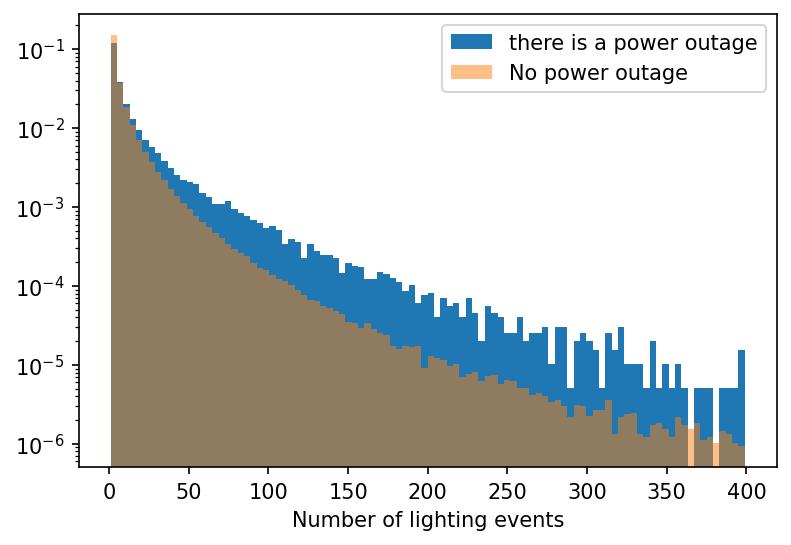

In [25]:
plt.hist(outage[outage['TOTAL_COUNT']<400]['TOTAL_COUNT'], density=True, log=True, bins=100, label='there is a power outage')
plt.hist(no_outage[no_outage['TOTAL_COUNT']<400]['TOTAL_COUNT'],  density=True, log=True, bins=100,label='No power outage', alpha=0.5)
#plt.hist(light[light['TOTAL_COUNT']<40]['TOTAL_COUNT'], density=True, bins=50, label='All', alpha=0.5)
#plt.xlim(0,200)
plt.xlabel('Number of lighting events')
plt.legend()

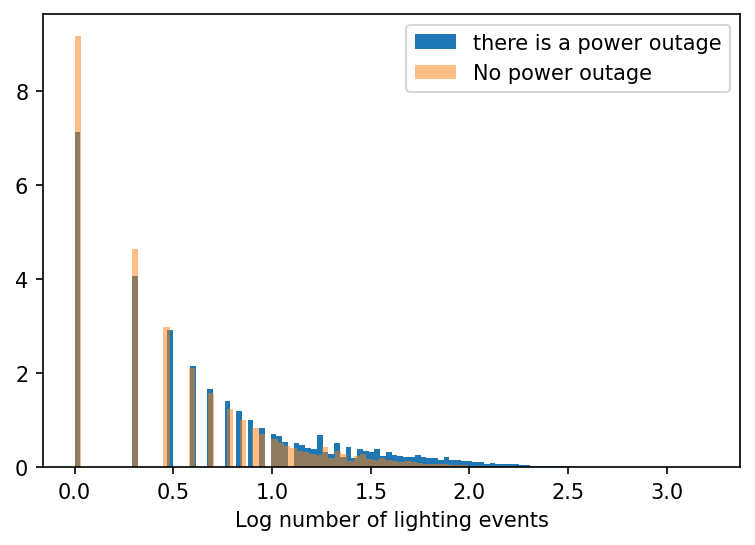

In [27]:
plt.hist(np.log10(outage['TOTAL_COUNT']), density=True, bins=100, label='there is a power outage')
plt.hist(np.log10(no_outage['TOTAL_COUNT']),  density=True, bins=100,label='No power outage', alpha=0.5)
#plt.hist(light[light['TOTAL_COUNT']<40]['TOTAL_COUNT'], density=True, bins=50, label='All', alpha=0.5)
#plt.xlim(0,200)
plt.xlabel('Log number of lighting events')
plt.legend()

## Hail

In [31]:
hail = read_merged('hail', 2019)

In [32]:
hail.head()

,Unnamed: 0,index,DATE,LAT_mean,LON_mean,SEVPROB_max,PROB_max,MAXSIZE_max,county,state,power_outage
0,0,0,2019-01-01,32.593070,-116.090870,20,30,0.5,Tecate,Baja California,False
1,1,1,2019-01-01,60.499460,-144.926380,10,60,0.5,Valdez-Cordova Census Area,Alaska,False
2,2,2,2019-01-02,35.041930,-97.930750,10,40,0.5,Grady County,Oklahoma,False
3,3,3,2019-01-02,35.050460,-98.002725,30,90,0.5,Grady County,Oklahoma,False
4,4,4,2019-01-02,34.957015,-98.064268,40,90,0.5,Grady County,Oklahoma,False


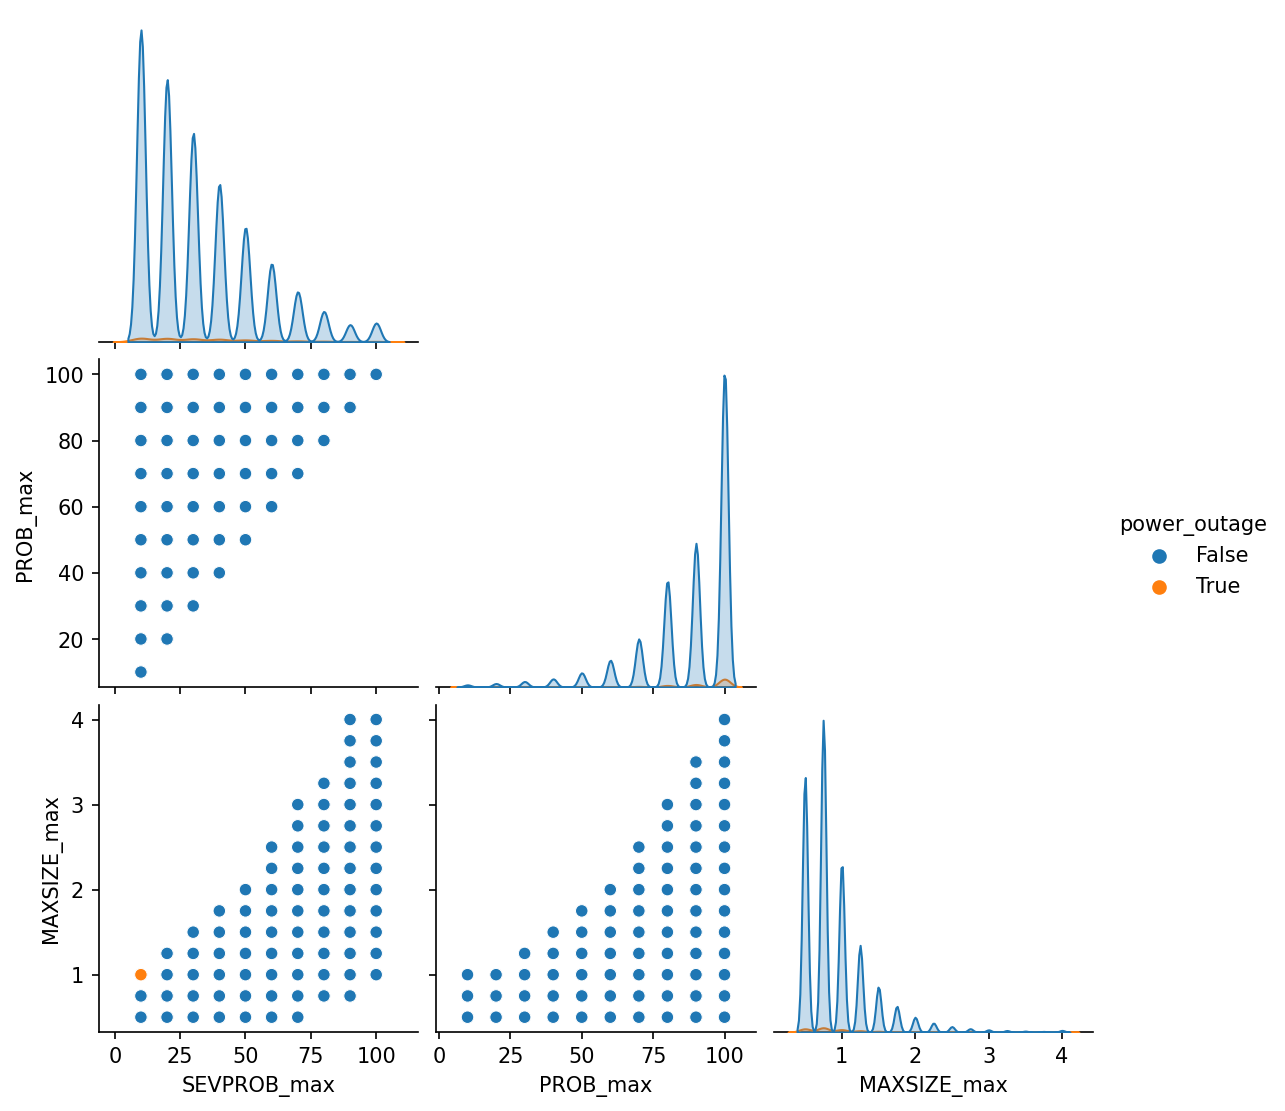

In [35]:
sns.pairplot(hail, x_vars=['SEVPROB_max', 'PROB_max', 'MAXSIZE_max'], y_vars=['SEVPROB_max', 'PROB_max', 'MAXSIZE_max'], hue='power_outage', corner=True)

### Here the problem is that the dataset is unbalanced. Let's try to balance it

### Method1

In [59]:
hail_grouped_by = hail.groupby(['power_outage'])
hail_balanced = hail_grouped_by.apply(lambda x: x.sample(hail_grouped_by.size().min()).reset_index(drop=True))
hail_balanced = hail_balanced.droplevel(['power_outage'])
#hail_balanced

### Method2

In [48]:
outage = hail[hail['power_outage']==True]
no_outage = hail[hail['power_outage']==False]
no_outage = no_outage.sample(n=len(outage), random_state=290)
hail_balanced = pd.concat([outage, no_outage],axis=0)

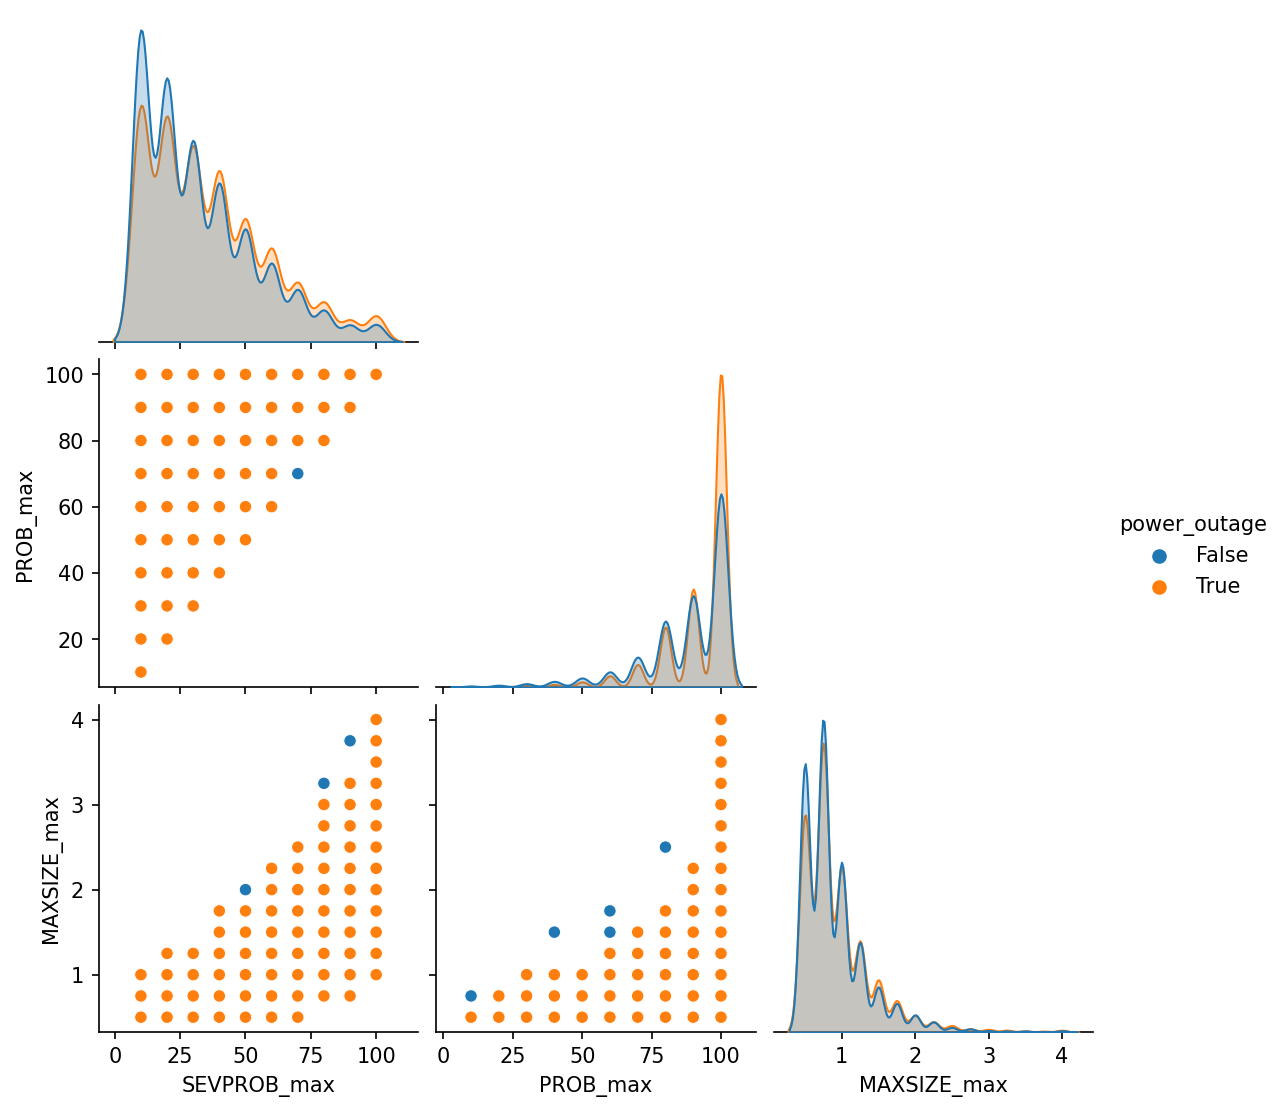

In [60]:
sns.pairplot(hail_balanced, x_vars=['SEVPROB_max', 'PROB_max', 'MAXSIZE_max'], y_vars=['SEVPROB_max', 'PROB_max', 'MAXSIZE_max'], hue='power_outage', corner=True)

# Tornados

In [69]:
tornados = read_merged('tornados', 2019)

In [62]:
tornados.head()

,Unnamed: 0,DATE,LAT_mean,LON_mean,AVGDV_max,LLDV_max,MXDV_max,MXDV_HEIGHT_max,DEPTH_max,MAX_SHEAR_max,MAX_SHEAR_HEIGHT_max,county,state,power_outage
0,0,2019-01-01,42.191970,-75.78346,38,62,62,11,6.8,112,11.2,Broome County,New York,False
1,1,2019-01-01,42.193790,-76.14176,35,60,60,9,5.1,128,9.4,Tioga County,New York,False
2,2,2019-01-01,42.026670,-76.11920,31,49,52,10,6.3,68,10.3,Tioga County,New York,False
3,3,2019-01-01,42.784605,-78.87106,48,55,62,2,5.9,112,2.3,Erie County,New York,False
4,4,2019-01-01,42.897760,-78.87968,42,49,65,9,8.1,146,9.0,Erie County,New York,False


In [67]:
tornados = tornados[(0<=tornados['AVGDV_max'])*(tornados['AVGDV_max']<300)*(tornados['LLDV_max']>=0)*(tornados['MAX_SHEAR_max']<700)]

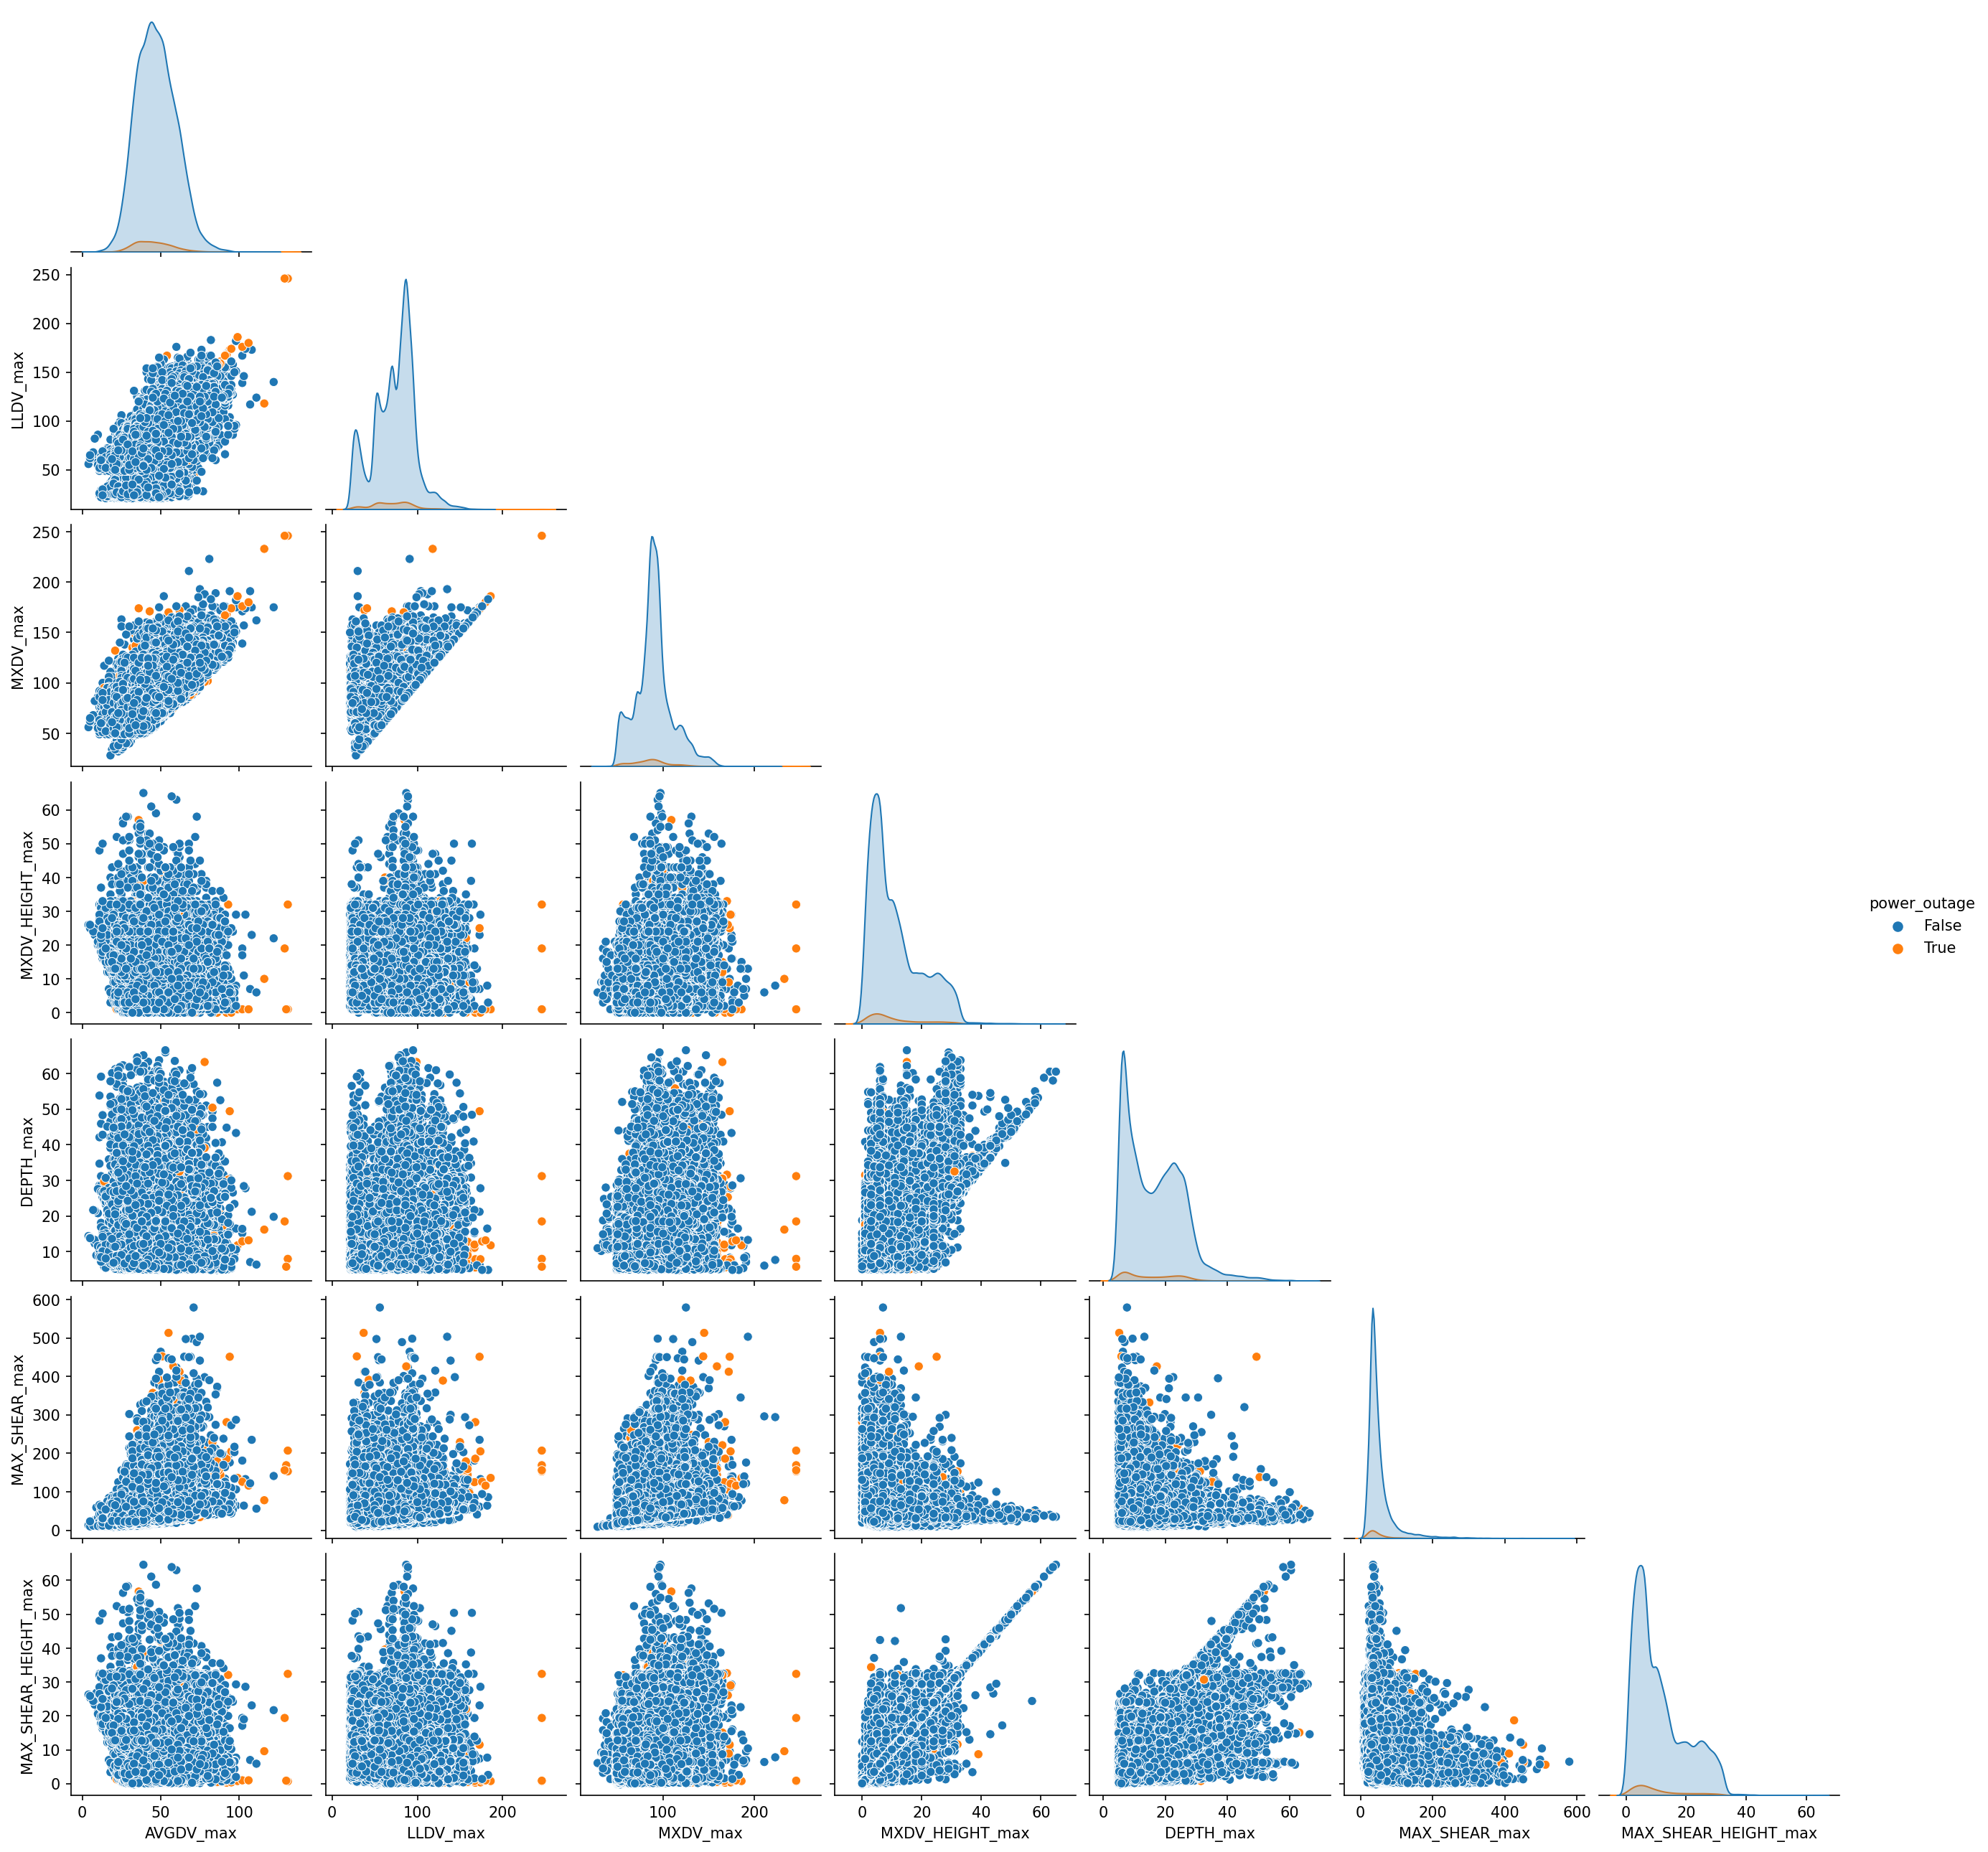

In [70]:
sns.pairplot(tornados, x_vars=['AVGDV_max', 'LLDV_max', 'MXDV_max', 'MXDV_HEIGHT_max', 'DEPTH_max', 'MAX_SHEAR_max','MAX_SHEAR_HEIGHT_max'], y_vars=['AVGDV_max', 'LLDV_max', 'MXDV_max', 'MXDV_HEIGHT_max', 'DEPTH_max', 'MAX_SHEAR_max','MAX_SHEAR_HEIGHT_max'], hue='power_outage', corner=True)

# Storm structure

In [3]:
storm = read_merged('storm', 2019)

In [4]:
storm.head()

,Unnamed: 0,index,DATE,LAT_mean,LON_mean,MAX_REFLECT_max,VIL_max,HEIGHT_max,county,state,power_outage
0,0,0,2019-01-01,35.625237,-106.501728,38,1,5.4,Sandoval County,New Mexico,False
1,1,1,2019-01-01,35.385530,-107.268540,32,0,4.0,Cibola County,New Mexico,False
2,2,2,2019-01-01,34.944938,-106.137023,34,0,4.5,Torrance County,New Mexico,False
3,3,3,2019-01-01,35.469160,-106.943330,32,0,2.1,Sandoval County,New Mexico,False
4,4,4,2019-01-01,34.870822,-106.253751,39,1,5.6,Bernalillo County,New Mexico,False


In [5]:
cols = ['MAX_REFLECT_max', 'VIL_max', 'HEIGHT_max']

In [10]:
storm['power_outage'].value_counts(normalize=True)

False    0.986502
True     0.013498
Name: power_outage, dtype: float64

In [15]:
st = storm.sample(frac=0.5)

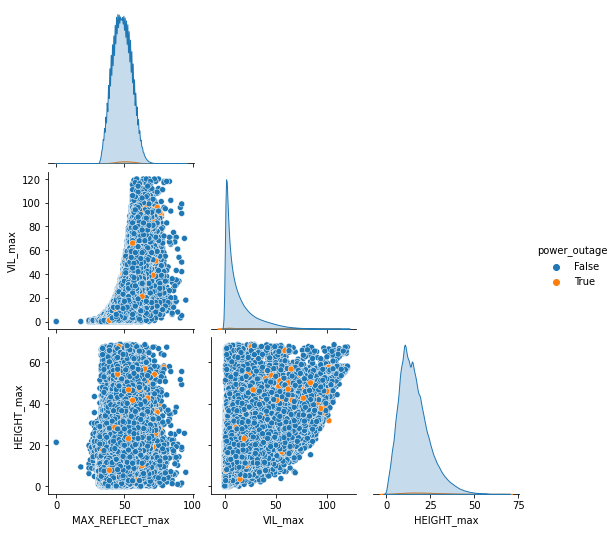

In [16]:
sns.pairplot(st, x_vars=cols, y_vars=cols, hue='power_outage', corner=True)

### Balanced version

In [18]:
structure_grouped_by = storm.groupby(['power_outage'])
structure_balanced = structure_grouped_by.apply(lambda x: x.sample(structure_grouped_by.size().min()).reset_index(drop=True))
structure_balanced = structure_balanced.droplevel(['power_outage'])

In [21]:
sns.pairplot(structure_balanced, x_vars=cols, y_vars=cols, hue='power_outage', corner=True)

TypeError: pairplot() got an unexpected keyword argument 's'